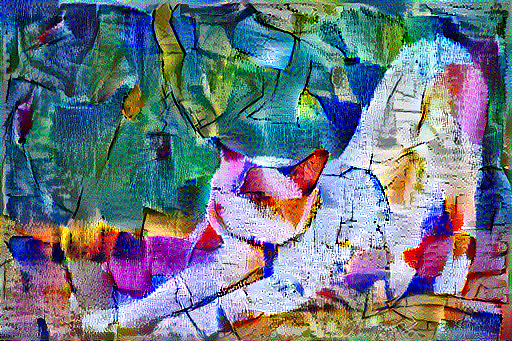

Train Step: 1000
Total Time: 89.0


In [2]:
# %load weights.py
from StyleTransfer import *
import pickle

content_image_path = "stretching-white-cat-979247.jpg"
style_image_path = "blue-and-red-abstract-painting-1799912.jpg"

content_weights = [10**(2*x) for x in range(-2, 3)]
style_weights = [10**(2*x) for x in range(-2, 3)]

images = []

for i in range(len(content_weights)):
    for j in range(len(style_weights)):
        tf.keras.backend.clear_session()
        model = StyleTransfer(content_image_path, style_image_path)
        opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
        model.transfer(opt, style_weight=style_weights[j], content_weight=content_weights[i])
        images.append(model.display_tensor(model.img).copy())

with open("images.pickle", "wb") as outFile:
    pickle.dump(images, outFile)

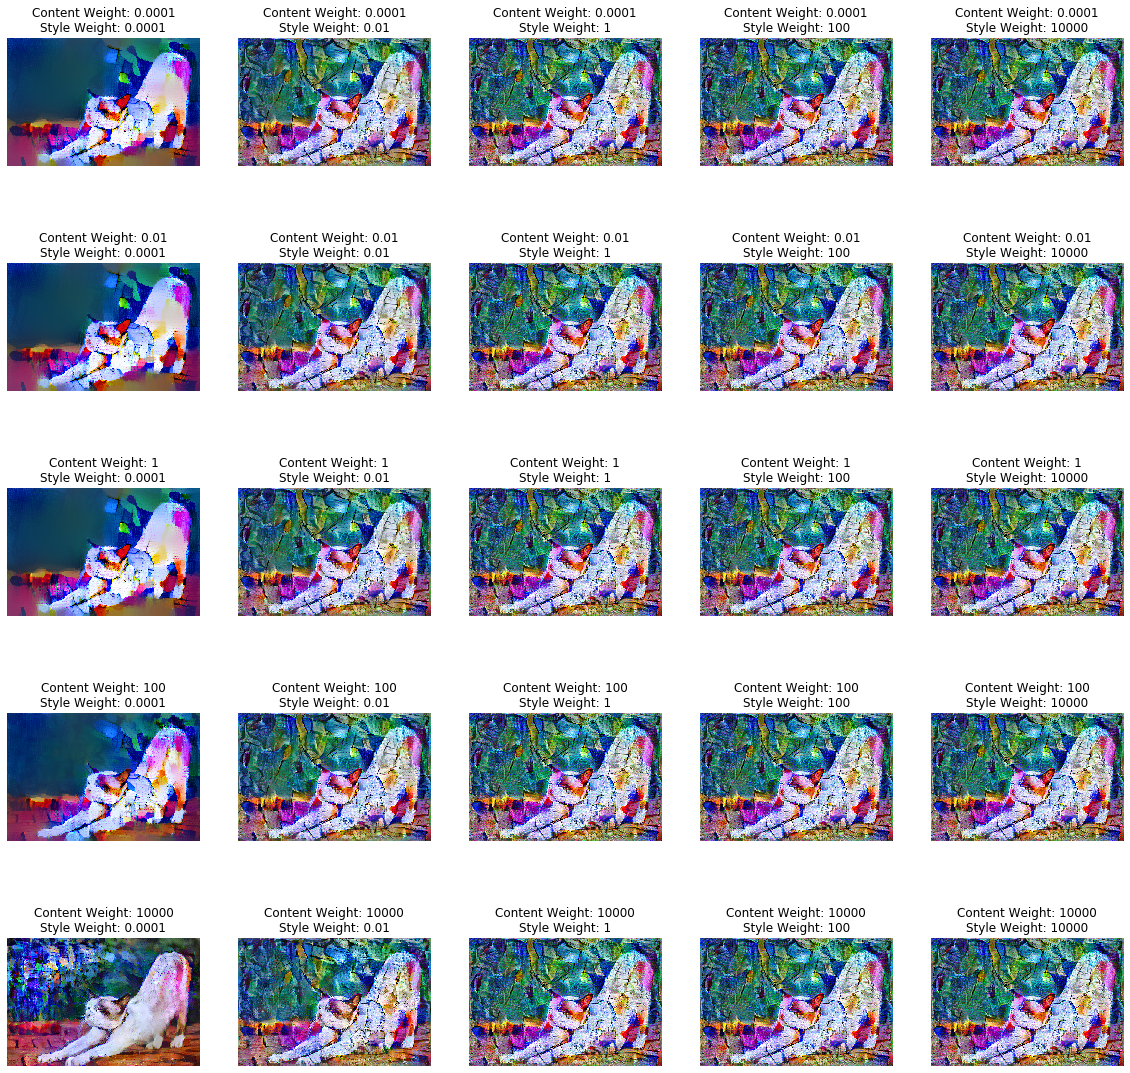

In [4]:
with open("images.pickle", "rb") as inFile:
    imgs = pickle.load(inFile)
plt.figure(figsize=(20, 20))
for i in range(len(content_weights)):
    for j in range(len(style_weights)):
        ax = plt.subplot(5, 5, 1+j+5*i)
        ax.set_title("Content Weight: {0}\nStyle Weight: {1}".format(content_weights[i], style_weights[j]))
        ax.imshow(imgs[j+5*i])
        ax.axis("off")
plt.savefig("weights.png")
plt.show()